In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from recast import *

### Loi Gamma :

$$f(x,\alpha, \beta) = x^{\alpha - 1} \frac{\beta^\alpha e^{-\beta x}}
{\Gamma(\alpha)}, \qquad x > 0$$

$$F(x, \alpha, \beta) = \frac{\gamma(\alpha, \beta x)}{\Gamma(\alpha)}$$

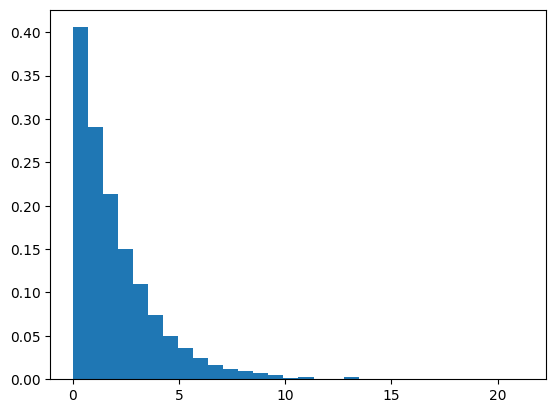

In [2]:
samples = tf.random.gamma([5000], alpha=1.0, beta=0.5)
plt.hist(samples, density=True, bins=30)
plt.show()

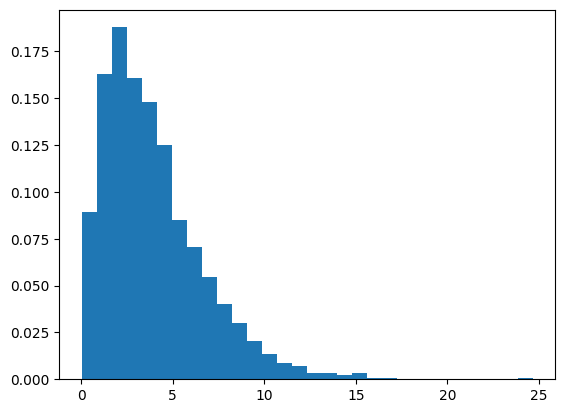

In [3]:
samples = tf.random.gamma([5000], alpha=2.0, beta=0.5)
plt.hist(samples, density=True, bins=30)
plt.show()

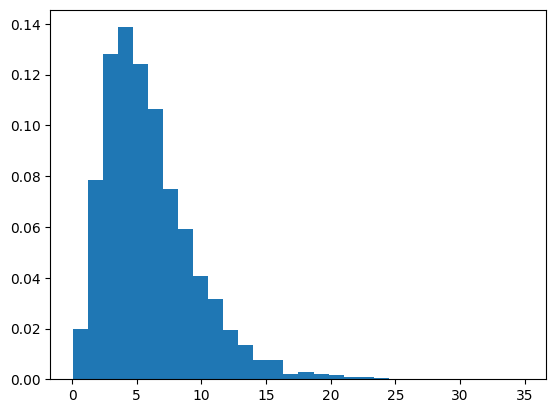

In [4]:
samples = tf.random.gamma([5000], alpha=3.0, beta=0.5)
plt.hist(samples, density=True, bins=30)
plt.show()

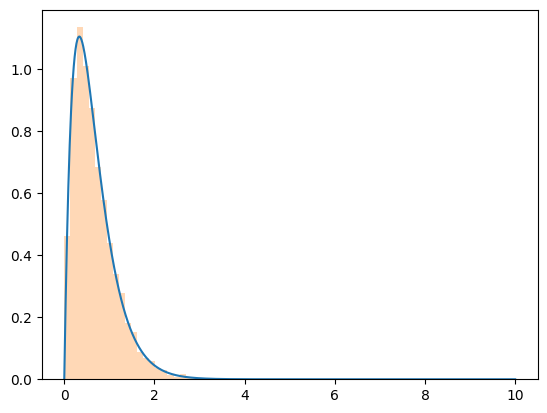

In [5]:
alpha = 2
beta = 3
g = Gamma(alpha, beta)
x = tf.Variable(np.linspace(0, 10, 1000), dtype=tf.float32)
y = tf.math.exp(g.log_prob(x))
plt.plot(x, y)
samples = tf.random.gamma([5000], alpha=alpha, beta=beta)
plt.hist(samples, density=True, bins=30, alpha=0.3)
plt.show()

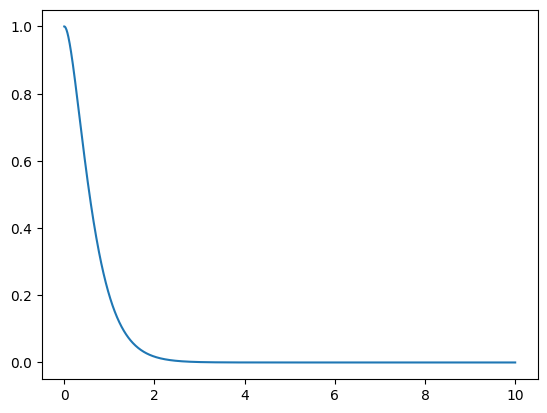

In [6]:
y = g.survival(x)
plt.plot(x, y)
plt.show()

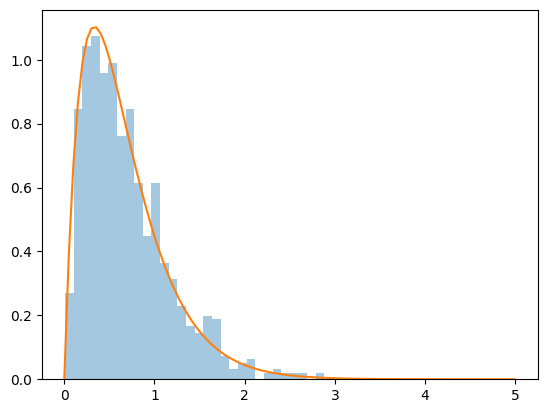

In [7]:
samples = g.sample([1000])
plt.hist(samples, bins=30, density=True, alpha=0.4)
x = tf.Variable(np.linspace(0, 5, 100), dtype=tf.float32)
plt.plot(x, g.prob(x))
plt.show()

### Entraînement avec la loi Gamma

In [8]:
file = open("data/shchur.pkl", "rb")
data = pickle.load(file)
t_end = data["t_end"]
arrival_times = data["arrival_times"]
seq_lengths = [len(times) for times in arrival_times]
inter_times_list = [np.diff(times, prepend=0, append=t_end)
                    for times in arrival_times]
inter_times = np.asarray([np.pad(inter_times, (0, np.max(seq_lengths) - size))
        for size, inter_times in zip(seq_lengths, inter_times_list)])
inter_times = tf.Variable(inter_times, dtype=tf.float32)

model = Model(32, Gamma)
model.fit(50, inter_times, seq_lengths, t_end)

Loss at epoch 0: 0.99
Loss at epoch 10: 0.82
Loss at epoch 20: 0.80
Loss at epoch 30: 0.80
Loss at epoch 40: 0.79
Loss at epoch 50: 0.79


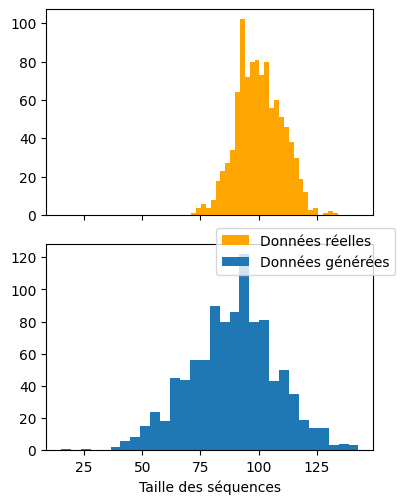

In [9]:
batch_size = 1000
t_end = 100
arrival_times = model.sample(batch_size, t_end)
generated_data = pd.DataFrame(arrival_times).T
generated_data.iloc[:10, :5]

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(4, 5))
fig.tight_layout()

seq_lengths = [len(seq) for seq in data["arrival_times"]]
axes[0].hist(seq_lengths, bins=30, color="orange", label="Données réelles")

seq_lengths = (arrival_times < t_end).sum(axis=-1)
axes[1].hist(seq_lengths, bins=30, label="Données générées")
axes[1].set_xlabel("Taille des séquences")

fig.legend(loc="center right", ncols=1)

plt.show()

### Entraînement avec la loi de Weibull

Loss at epoch 0: 1.17
Loss at epoch 10: 0.84
Loss at epoch 20: 0.81
Loss at epoch 30: 0.79
Loss at epoch 40: 0.78
Loss at epoch 50: 0.78


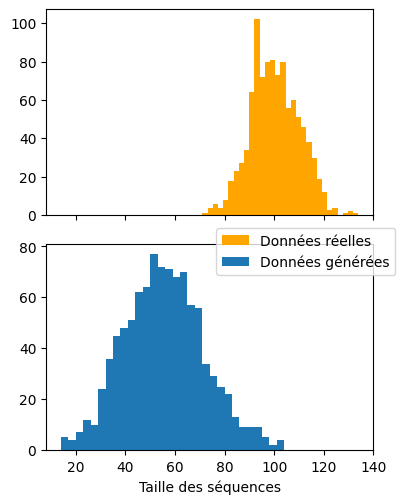

In [10]:
t_end = data["t_end"]
arrival_times = data["arrival_times"]
seq_lengths = [len(times) for times in arrival_times]
inter_times_list = [np.diff(times, prepend=0, append=t_end)
                    for times in arrival_times]
inter_times = np.asarray([np.pad(inter_times, (0, np.max(seq_lengths) - size))
        for size, inter_times in zip(seq_lengths, inter_times_list)])
inter_times = tf.Variable(inter_times, dtype=tf.float32)

model = Model(32, Weibull)
model.fit(50, inter_times, seq_lengths, t_end)

batch_size = 1000
t_end = 100
arrival_times = model.sample(batch_size, t_end)
generated_data = pd.DataFrame(arrival_times).T
generated_data.iloc[:10, :5]

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(4, 5))
fig.tight_layout()

seq_lengths = [len(seq) for seq in data["arrival_times"]]
axes[0].hist(seq_lengths, bins=30, color="orange", label="Données réelles")

seq_lengths = (arrival_times < t_end).sum(axis=-1)
axes[1].hist(seq_lengths, bins=30, label="Données générées")
axes[1].set_xlabel("Taille des séquences")

fig.legend(loc="center right", ncols=1)

plt.show()